## **Load libraries and data**

In [1]:
import gensim
import re
import pandas as pd
import pythainlp
import pyLDAvis.gensim_models
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning) 

C:\Users\Peach\anaconda3\envs\py37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Peach\anaconda3\envs\py37\lib\site-packages\ipykernel\pylab\config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
df = pd.read_csv('Wongnai Reviews - Small.csv')
df.head()

,Review ID,Review
0,1,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...
1,2,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...
2,3,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...
3,4,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...
4,5,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...


## Cleansing Words

In [3]:
def cleansing_text(text):
    # ลบ puncutation
    text = re.sub(r'[\n\!\@\#\฿\$\%\^\&\*\(\)\[\]\{\}\;\:\,\.\/\?\|\`\_\\+\\\=\~\-\<\>]', '', text)

    # ลบ space
    text = re.sub(r'[\r\n]', '', text)

    # ลบ number (0-9)
    text = re.sub(r'[0-9]','',text)
    
    # ลบ number (๐-๙)
    text = re.sub(r'[๐-๙]','',text)

    return text

In [4]:
df['Cleansing'] = df['Review'].apply(lambda x: cleansing_text(x))
df.head()

,Review ID,Review,Cleansing
0,1,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...
1,2,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...
2,3,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...
3,4,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...
4,5,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...


## **Tokenize Words**

In [5]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ', '  ', '\n', 'ร้าน', 'นะคะ', 'เค้า', 'กก', 'ผม', 'คน']
screening_words = stopwords + removed_words

def tokenize_with_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize(str(sentence), engine='newmm')
    for word in words:
        if word not in screening_words:
            merged = merged + ',' + word
    return merged[1:]

In [6]:
df['Tokenized'] = df['Cleansing'].apply(lambda x: tokenize_with_space(x))
df.head()

,Review ID,Review,Cleansing,Tokenized
0,1,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...,"ชอบ,ทาน,Macchiato,เป็นประจำ,นึง,เดิน,เข้าไป,สั..."
1,2,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...,"Art,of,Coffee,Kasetsart,ร้านกาแฟ,รสชาติ,เยี่ยม..."
2,3,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...,"กวง,ทะเล,เผา,อาหารทะเล,สด,เนื้อ,ปู,หวาน,คาว,เน..."
3,4,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,"มีโอกาส,ตื่น,เช้า,โอกาส,มาหา,อร่อย,ทาน,ตอนเช้า..."
4,5,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...,"ชอบ,ทาน,กิน,อาหาร,เวียดนาม,บ้าน,ซอย,ราชครู,เข้..."


## **Create Dictionary**

In [7]:
documents = df['Tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [8]:
print(dictionary.token2id.keys())

'Kingkong', 'Le', 'Lemon', 'Location', 'Macaroon', 'Mont', 'No', 'Portico', 'Potato', 'Raspberry', 'Sakura', 'Twinings', 'Yakiniku', 'Yuzu', 'farm', 'กระปรี้กระเปร่า', 'กลมกลืน', 'กานา', 'ของดี', 'คลายอารมณ์', 'ความนุ่ม', 'ความสวยงาม', 'ค์บ', 'จับตา', 'จางๆ', 'ฉ่ำ', 'ชุ่มชื่น', 'ซากุระ', 'ซุ', 'ฐาน', 'ดังนี้', 'ตั๋ว', 'ตึ๊บ', 'ทับ', 'ทาร์ต', 'ทำให้เกิด', 'ทิ', 'น่าดู', 'น้ำแร่', 'ประกบ', 'ประจำเมือง', 'ประณีต', 'ประดับ', 'ปลื้มใจ', 'ปาด', 'ปุปะ', 'ผลักดัน', 'ผสมผสาน', 'ผิว', 'ผ่อน', 'ฟิล', 'ฟุต', 'มโหฬาร', 'ยุโรป', 'ระยะหลัง', 'ราสเบอร์รี่', 'รู้ใจ', 'ลิ้นจี่', 'วาไรตี้', 'วิเคราะห์', 'สตรอเบอร์รี่', 'สภาพ', 'สอด', 'สังสรรค์', 'หนักหน่วง', 'ออกปาก', 'อัศจรรย์', 'อำพัน', 'อิ่มเอม', 'ฮอง', 'เกาลัด', 'เข้าด้วยกัน', 'เชื่อม', 'เป็นมา', 'เหนื่อยล้า', 'เอร็ดอร่อย', 'แชมเปี้ยน', 'แดงเข้ม', 'แตร์', 'แทรก', 'แหลม', 'แอพพริคอท', 'โมจิ', 'โอกินาวา', 'ใส้', 'ความขลัง', 'ทดลอง', 'สังขยา', 'โอเลี้ยง', 'ไปรษณีย์', 'I', 'Japan', 'Larb', 'you', 'กลิ่นอาย', 'ข้าวปั้น', 'ชาม', 'ช่างคิด', 'ตคอ', 'ตั๊กแตน'

In [9]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

## **Topic Modeling**

In [10]:
num_topics = 3
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 6.32 s


In [11]:
pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.078778  0.031692       1        1  38.124807
2     -0.002349 -0.060708       2        1  33.560972
0      0.081127  0.029016       3        1  28.314220, topic_info=       Term        Freq       Total Category  logprob  loglift
1      กาแฟ  277.000000  277.000000  Default  30.0000  30.0000
82      จาน  168.000000  168.000000  Default  29.0000  29.0000
32       ชา  228.000000  228.000000  Default  28.0000  28.0000
547    เค้ก  114.000000  114.000000  Default  27.0000  27.0000
863  ไข่มุก   94.000000   94.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
43     ราคา   43.198776  239.778383   Topic3  -5.3555  -0.4521
381      ดู   34.040264  127.337755   Topic3  -5.5938  -0.0575
6       ชอบ   37.646485  200.583863   Topic3  -5.4931  -0.4112
479     ลอง   32.075350  153.484840   Topic3  -5.6533  -0.3037
11      บาท   30.230026  208.207004   Topic3  -5.7125  -0.6679

[251 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
308       1  0.214898        "
308       2  0.452418        "
308       3  0.339313        "
1813      2  0.836089    April
1710      2  0.975496      Big
...     ...       ...      ...
865       2  0.957450  ไต้หวัน
615       1  0.303416      ไทย
615       2  0.505693      ไทย
615       3  0.202277      ไทย
1458      1  0.962513     ไปดู

[352 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [12]:
for i in range(num_topics):
    print(', '.join([word for word, value in model.show_topic(i, 30)]))

อร่อย, ทาน, รสชาติ, ดี, กิน, จาน, อาหาร, เนื้อ, หมู, เมนู, สั่ง, น้ำ, หวาน, ปลา, ราคา, รส, กุ้ง, ชอบ, โต๊ะ, หอม, ดู, ส้มตำ, ใส่, ลอง, ซอส, ทอด, บาท, กรอบ, ", เส้น
กาแฟ, อร่อย, กิน, ดี, ทาน, รสชาติ, นั่ง, สั่ง, ราคา, ชา, ชอบ, เค้ก, เมนู, ลอง, หวาน, บาท, บรรยากาศ, อาหาร, บริการ, ร้านกาแฟ, เครื่องดื่ม, นม, ดู, แก้ว, รส, ขาย, หอม, เลือก, เย็น, ร้อน
รสชาติ, อร่อย, เมนู, ชา, อาหาร, ราคา, ดี, บาท, สั่ง, ทาน, จาน, นม, กิน, ชอบ, กาแฟ, ไข่มุก, หวาน, เลือก, เนื้อ, หอม, น้ำ, ", ลอง, ดู, เครื่องดื่ม, นั่ง, ที่นี่, บรรยากาศ, ยำ, ไทย


In [13]:
df['topics'] = df['Tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [14]:
df.head()

,Review ID,Review,Cleansing,Tokenized,topics,score
0,1,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...,เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...,"ชอบ,ทาน,Macchiato,เป็นประจำ,นึง,เดิน,เข้าไป,สั...",1,0.997477
1,2,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...,Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...,"Art,of,Coffee,Kasetsart,ร้านกาแฟ,รสชาติ,เยี่ยม...",2,0.997660
2,3,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...,กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...,"กวง,ทะเล,เผา,อาหารทะเล,สด,เนื้อ,ปู,หวาน,คาว,เน...",0,0.999558
3,4,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...,"มีโอกาส,ตื่น,เช้า,โอกาส,มาหา,อร่อย,ทาน,ตอนเช้า...",0,0.998409
4,5,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...,ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...,"ชอบ,ทาน,กิน,อาหาร,เวียดนาม,บ้าน,ซอย,ราชครู,เข้...",2,0.998550


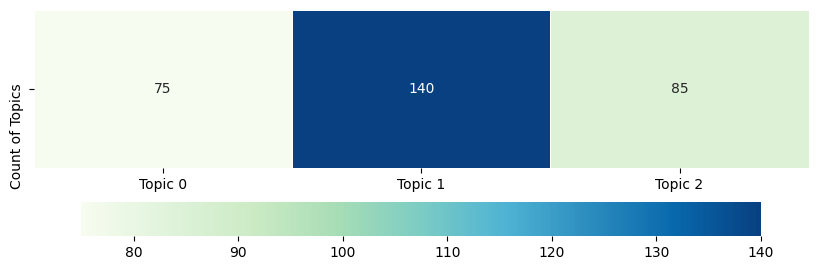

In [15]:
sns_data = pd.DataFrame({
  'Columns': ["Topic " + str(i) for i in range(num_topics)], 
  'Rows': ["Count of Topics" for i in range(num_topics)], 
  'value': [len(df[df['topics'] == i]) for i in range(num_topics)]
})
result = sns_data.pivot(index='Rows', columns='Columns', values='value')

fig, ax = plt.subplots(1, 1, figsize = (10, 3), dpi=100)
sns.heatmap(result, annot=True, fmt="g", cmap='GnBu', linewidths=.5, cbar_kws={"orientation": "horizontal"})

# ADDED: Remove labels.
ax.set_ylabel('')    
ax.set_xlabel('')

plt.show()